<a href="https://colab.research.google.com/github/urness/CS167Code/blob/main/Day_15_Notes_SVM_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 15 Notes: Support Vector Machines
Spring 2022

In [41]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

#load data
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/irisData.csv')
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Scikit learn has a classifier for SVC:
- [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

In [77]:
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.9333333333333333
                   Pred Iris-setosa  Pred Iris-versicolor  Pred Iris-virginica
T Iris-setosa                     9                     0                    0
T Iris-versicolor                 0                    10                    1
T Iris-virginica                  0                     1                    9


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas

# updated: March 25, 2022
#This code is based on the example here: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#Parameters: the data set as a Pandas dataframe, the names of the predictors to put on the x and y axes,
#the name of the target column, and the classifier object to use

def plot_decision_boundary(data,x_name,y_name,target_name,clf):

  #list of the values appearing in the target column
  class_labels = data[target_name].unique()

  #converting from categorical target values to numbers so we can plot them with a contour plot
  target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

  # get the data
  X = data[[x_name, y_name]].values 
  y = target_col_nums.values

  h = .02  # step size in the mesh
  
  #train our classifier
  model = clf.fit(X,y)

  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  # predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolors='k')
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(str(clf))
  plt.show()

  predictions = pandas.Series(clf.predict(X))
  print("training set accuracy:", metrics.accuracy_score(y, predictions))


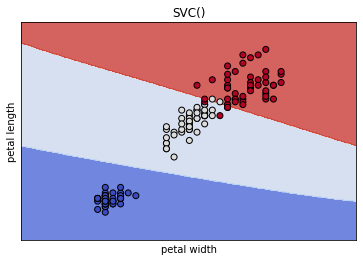

training set accuracy: 0.9533333333333334


In [79]:
#default SVC
plot_decision_boundary(data,'petal width','petal length','species',SVC())

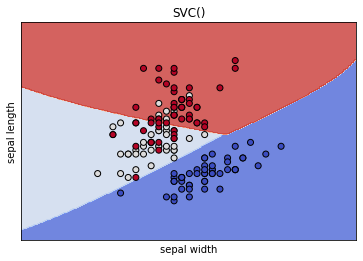

training set accuracy: 0.82


In [81]:
# try switching labels
plot_decision_boundary(data,'sepal width','sepal length','species',SVC())

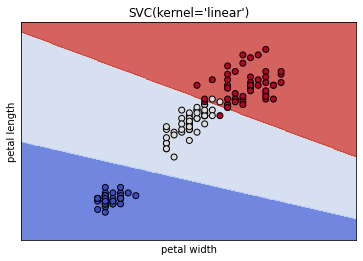

training set accuracy: 0.9666666666666667


In [82]:
#linear kernel
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='linear'))

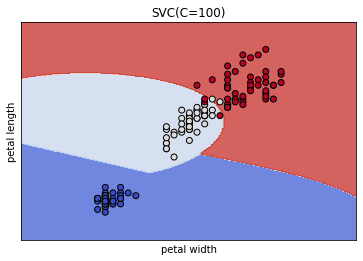

training set accuracy: 0.96


In [83]:
#larger value for C
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=100))

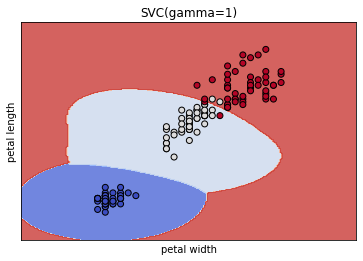

training set accuracy: 0.9666666666666667


In [84]:
# set gamma
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=1))

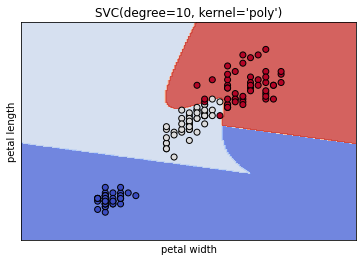

training set accuracy: 0.9733333333333334


In [85]:
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='poly', degree= 10))

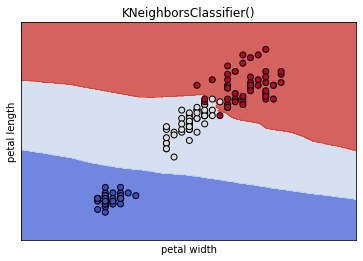

training set accuracy: 0.96


In [87]:
from sklearn import neighbors
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = "uniform")
plot_decision_boundary(data,'petal width','petal length','species',neigh)

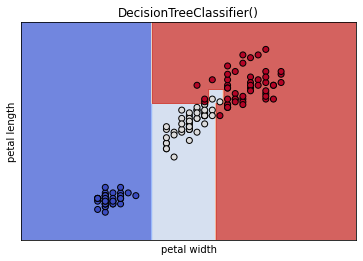

training set accuracy: 0.9933333333333333


In [88]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
plot_decision_boundary(data,'petal width','petal length','species',dt)

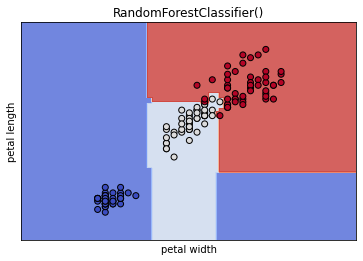

training set accuracy: 0.9933333333333333


In [89]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
plot_decision_boundary(data,'petal width','petal length','species',forest)